In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
# from torchvision.transforms import functional as TF


In [2]:
from torchvision import transforms
from PIL import Image
image_path = '/root/zhangzhongwang/book/cat_fitting/cat_fitting_2.png'
image = Image.open(image_path)

# 使用torchvision.transforms定义一个resize操作
transform = transforms.Compose([
    transforms.Resize((75, 60)),
    transforms.Grayscale(),
    transforms.ToTensor(),
])

# 应用resize操作到图片
resized_image = transform(image)

# 显示图片


In [3]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 500)
        self.fc2 = nn.Linear(500, 400)
        self.fc3 = nn.Linear(400, 300)
        self.fc4 = nn.Linear(300, 200)
        self.fc5 = nn.Linear(200, 200)
        self.fc6 = nn.Linear(200, 100)
        self.fc7 = nn.Linear(100, 1)  # 隐藏层到输出层
        self._initialize_weights()

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        x = torch.tanh(self.fc4(x))
        x = torch.tanh(self.fc5(x))
        x = torch.tanh(self.fc6(x))
        x = self.fc7(x)
        
        return x
    
    def _initialize_weights(self) -> None:
        # print(self.initialization)
  
        for obj in self.modules():
            if isinstance(obj, (nn.Linear,nn.Conv2d)):
                nn.init.normal_(obj.weight.data, 0, 0.5)
                # nn.init.normal_(obj.weight, 0, 0.01)
                if obj.bias is not None:
                    nn.init.normal_(obj.bias.data, 0, 0.5)
                    # nn.init.constant_(obj.bias, 0)
        


In [4]:
resized_image.shape

torch.Size([1, 75, 60])

In [5]:
# 生成图片中每个像素的坐标
_, height, width = resized_image.shape
Y, X = torch.meshgrid(torch.arange(height)/224, torch.arange(0,width,2)/224, indexing='ij')
coords = torch.stack((Y.flatten(), X.flatten()), dim=1).float().cuda()

# 目标灰度值
resized_image_half = resized_image[:, :, ::2]
targets = resized_image_half.flatten()[:, None].cuda()


In [6]:
coords.shape, targets.shape

(torch.Size([2250, 2]), torch.Size([2250, 1]))

In [7]:
Y2, X2 = torch.meshgrid(torch.arange(height)/224, torch.arange(width)/224, indexing='ij')
coords2 = torch.stack((Y2.flatten(), X2.flatten()), dim=1).float().cuda()

In [8]:
model = SimpleNN().cuda()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.00005)


In [ ]:

# 训练轮次
epochs = 1000000

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(coords)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')

    if epoch %5000==0:
        torch.save(model.state_dict(), f'/root/zhangzhongwang/book/cat_fitting/model_{epoch}.pth')
        plt.figure()
        plt.imshow(model(coords2).reshape(height, width).detach().cpu().numpy(), cmap='gray')
        plt.savefig(f'/root/zhangzhongwang/book/cat_fitting/pic/model_{epoch}.png')
        plt.close()


Epoch [0/1000000], Loss: 46.3948
Epoch [100/1000000], Loss: 0.4130
Epoch [200/1000000], Loss: 0.2052
Epoch [300/1000000], Loss: 0.1383
Epoch [400/1000000], Loss: 0.1043
Epoch [500/1000000], Loss: 0.0830
Epoch [600/1000000], Loss: 0.0680
Epoch [700/1000000], Loss: 0.0571
Epoch [800/1000000], Loss: 0.0488
Epoch [900/1000000], Loss: 0.0424
Epoch [1000/1000000], Loss: 0.0373
Epoch [1100/1000000], Loss: 0.0332
Epoch [1200/1000000], Loss: 0.0297
Epoch [1300/1000000], Loss: 0.0267
Epoch [1400/1000000], Loss: 0.0241
Epoch [1500/1000000], Loss: 0.0219
Epoch [1600/1000000], Loss: 0.0201
Epoch [1700/1000000], Loss: 0.0185
Epoch [1800/1000000], Loss: 0.0171
Epoch [1900/1000000], Loss: 0.0158
Epoch [2000/1000000], Loss: 0.0147
Epoch [2100/1000000], Loss: 0.0138
Epoch [2200/1000000], Loss: 0.0129
Epoch [2300/1000000], Loss: 0.0123
Epoch [2400/1000000], Loss: 0.0114
Epoch [2500/1000000], Loss: 0.0106
Epoch [2600/1000000], Loss: 0.0099
Epoch [2700/1000000], Loss: 0.0094
Epoch [2800/1000000], Loss: 0.0

KeyboardInterrupt: 

In [9]:
import matplotlib.pyplot as plt
import numpy as np


def format_settings(
        wspace=0.25, 
        hspace=0.4, 
        left=0.12, 
        right=0.9, 
        bottom=0.15, 
        top=0.95,
        fs=12,
        show_dpi=80,
        save_dpi=300,
        lw=1.5,
        ms=5,
        axlw=1.5,
        major_tick_len=5,
        major_tick_width=1.5,
        major_tick_pad=5,
        minor_tick_len=0,
        minor_tick_width=0,
        minor_tick_pad=5,
        ):
    '''
        使用方法：
            fig = plt.figure(figsize=(12, 4), dpi=300)
            format_settings()
            grid = plt.GridSpec(2, 2)
            ax1 = fig.add_subplot(grid[0, 0]) # 左上角图
            ax2 = fig.add_subplot(grid[0, 1]) # 右上角图
            ax3 = fig.add_subplot(grid[:, 0]) # 底部空间合并一张图
        注意：
            以上文字和坐标轴粗细适用于figsize长度为12的情形，宽度可调。
            若要调整figsize长度，需要相应调整以上文字和坐标轴粗细。
    '''
    # 设置子图线宽
    plt.rcParams['lines.linewidth'] = lw
    
    # 子图点大小
    plt.rcParams['lines.markersize'] = ms
    
    # 子图间距与位置  w:左右 h:上下
    plt.subplots_adjust(wspace=wspace, hspace=hspace, left=left, right=right, bottom=bottom, top=top)

    # 字体大小
    plt.rcParams['font.size'] = fs
    plt.rcParams['axes.labelsize'] = fs
    plt.rcParams['axes.titlesize'] = fs
    plt.rcParams['xtick.labelsize'] =fs
    plt.rcParams['ytick.labelsize'] = fs
    plt.rcParams['legend.fontsize'] = fs
    # 子图坐标轴宽度
    plt.rcParams['axes.linewidth'] = axlw
    # 子图坐标轴可见性
    plt.rcParams['axes.spines.top'] = True
    plt.rcParams['axes.spines.right'] = True
    plt.rcParams['axes.spines.left'] = True
    plt.rcParams['axes.spines.bottom'] = True

    # 子图坐标轴刻度宽度
    plt.rcParams['xtick.major.width'] = major_tick_width
    plt.rcParams['ytick.major.width'] = major_tick_width
    plt.rcParams['xtick.minor.width'] = minor_tick_width
    plt.rcParams['ytick.minor.width'] = minor_tick_width
    # 子图坐标轴刻度长度
    plt.rcParams['xtick.major.size'] = major_tick_len
    plt.rcParams['ytick.major.size'] = major_tick_len
    plt.rcParams['xtick.minor.size'] = minor_tick_len
    plt.rcParams['ytick.minor.size'] = minor_tick_len
    # 子图坐标轴刻度标签位置
    plt.rcParams['xtick.major.pad'] = major_tick_pad
    plt.rcParams['ytick.major.pad'] = major_tick_pad
    plt.rcParams['xtick.minor.pad'] = minor_tick_pad
    plt.rcParams['ytick.minor.pad'] = minor_tick_pad
    
    # 子图坐标轴刻度标签位置
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    # 子图坐标轴刻度标签位置
    plt.rcParams['xtick.top'] = False 
    plt.rcParams['ytick.right'] = False
    # 子图坐标轴刻度标签位置
    plt.rcParams['xtick.minor.visible'] = False
    plt.rcParams['ytick.minor.visible'] = False
    # 子图坐标轴刻度标签位置
    plt.rcParams['legend.frameon'] = False
    # 子图坐标轴刻度标签位置
    plt.rcParams['figure.dpi'] = show_dpi
    # 子图坐标轴刻度标签位置
    plt.rcParams['savefig.dpi'] = save_dpi


/tmp/ipykernel_1529695/1258765023.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_state = torch.load('/root/zhangzhongwang/book/cat_fitting/model_20000.pth')
/tmp/

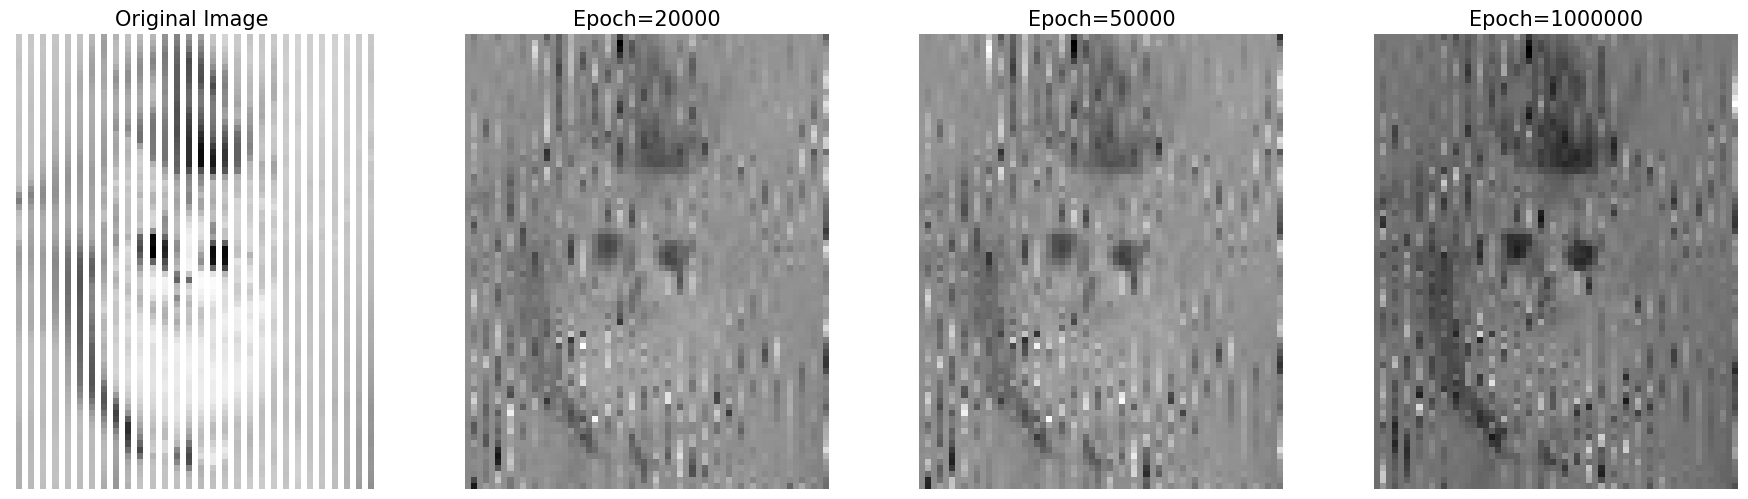

In [10]:



image_target = resized_image.cpu().numpy().reshape(height, width)
image_modified = image_target.copy()

image_modified[:, ::2] = 255 if image_modified.dtype == np.uint8 else 1.0

model_state = torch.load('/root/zhangzhongwang/book/cat_fitting/model_20000.pth')
model.load_state_dict(model_state)
with torch.no_grad():
    predicted1 = model(coords2).reshape(height, width).cpu().numpy()
model_state = torch.load('/root/zhangzhongwang/book/cat_fitting/model_50000.pth')
model.load_state_dict(model_state)
with torch.no_grad():
    predicted2 = model(coords2).reshape(height, width).cpu().numpy()
model_state = torch.load('/root/zhangzhongwang/book/cat_fitting/model_295000.pth')
model.load_state_dict(model_state)
with torch.no_grad():
    predicted3 = model(coords2).reshape(height, width).cpu().numpy()
plt.figure(figsize=(18, 5))
format_settings(left=0.02, right=0.98, bottom=0.04
        )
plt.subplot(1, 4, 1)
plt.title('Original Image', fontsize=15)
plt.imshow(image_modified, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.title('Epoch=20000', fontsize=15)
plt.imshow(predicted1, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.title('Epoch=50000', fontsize=15)
plt.imshow(predicted2, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.title('Epoch=1000000', fontsize=15)
plt.imshow(predicted3, cmap='gray')
plt.axis('off')

plt.savefig('/root/zhangzhongwang/book/cat_fitting/cat_fitting_large_ini.png', dpi=300)

# plt.show(dpi=300)


# Large initialization

/tmp/ipykernel_1529695/3795617438.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_state = torch.load('/root/zhangzhongwang/book/cat_fitting/model_20000.pth')
/tmp/

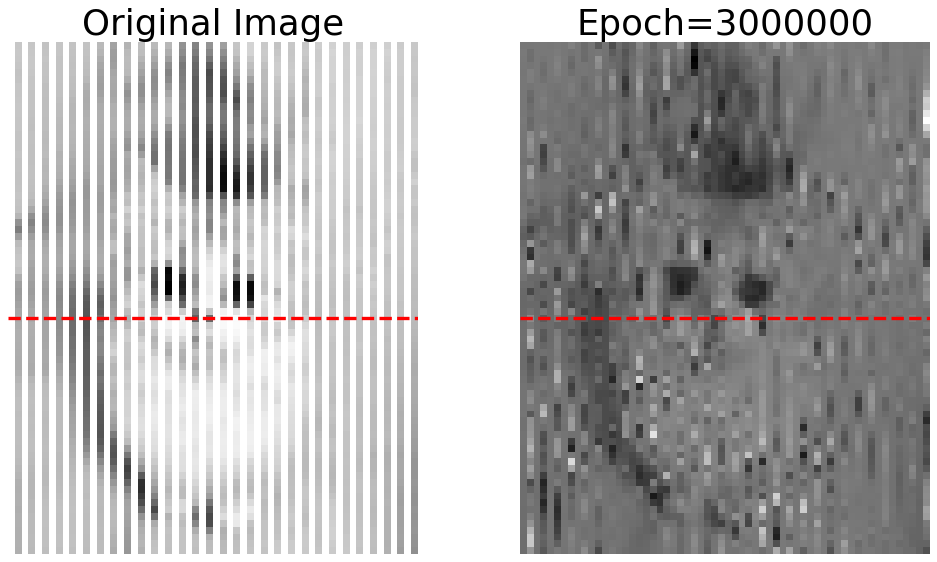

In [11]:

image_target = resized_image.cpu().numpy().reshape(height, width)
image_modified = image_target.copy()

image_modified[:, ::2] = 255 if image_modified.dtype == np.uint8 else 1.0

model_state = torch.load('/root/zhangzhongwang/book/cat_fitting/model_20000.pth')
model.load_state_dict(model_state)
with torch.no_grad():
    predicted1 = model(coords2).reshape(height, width).cpu().numpy()
model_state = torch.load('/root/zhangzhongwang/book/cat_fitting/model_50000.pth')
model.load_state_dict(model_state)
with torch.no_grad():
    predicted2 = model(coords2).reshape(height, width).cpu().numpy()
model_state = torch.load('/root/zhangzhongwang/book/cat_fitting/model_295000.pth')
model.load_state_dict(model_state)
with torch.no_grad():
    predicted3 = model(coords2).reshape(height, width).cpu().numpy()

plt.figure(figsize=(12, 8))
format_settings(left=0.02, right=0.98, bottom=0.04
        )
plt.subplot(1, 2, 1)
plt.title('Original Image', fontsize=32)
plt.imshow(image_modified, cmap='gray')
plt.axhline(40, color='r', linestyle='--', linewidth=3)
plt.axis('off')
# plt.subplot(1, 4, 2)
# plt.title('Epoch=20000', fontsize=15)
# plt.imshow(predicted1, cmap='gray')
# plt.axis('off')
# plt.subplot(1, 4, 3)
# plt.title('Epoch=50000', fontsize=15)
# plt.imshow(predicted2, cmap='gray')
# plt.axis('off')
plt.subplot(1, 2,2)
plt.title('Epoch=3000000', fontsize=32)
plt.imshow(predicted3, cmap='gray')
plt.axhline(40, color='r', linestyle='--', linewidth=3)
plt.axis('off')

plt.savefig('/root/zhangzhongwang/book/cat_fitting/cat_fitting_large_ini.png', dpi=300)

# plt.show(dpi=300)

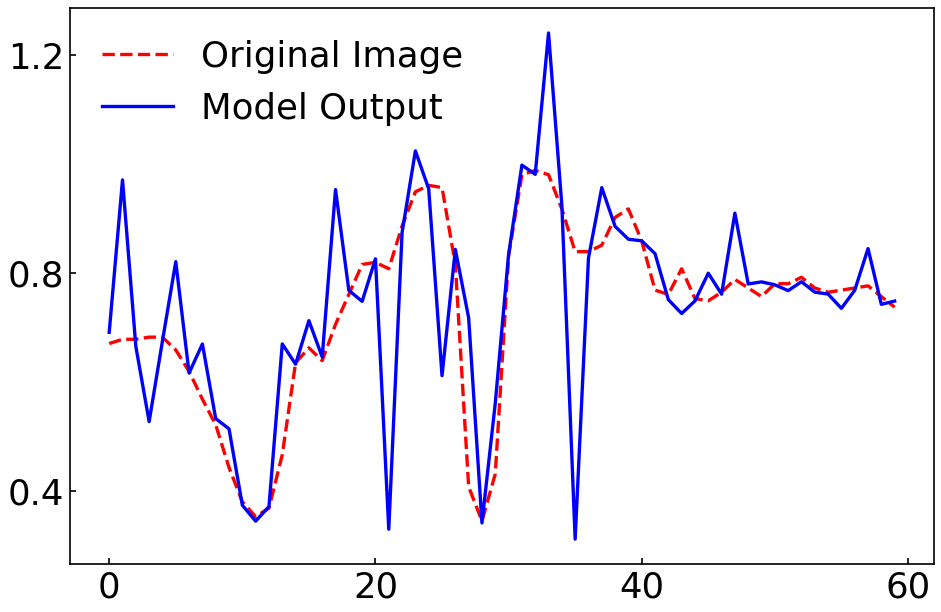

In [13]:
plt.figure(figsize=(12, 8))
format_settings(left=0.08, right=0.98, bottom=0.08, fs=32, lw=3
        )


plt.plot(image_target[40, :], color='r',linestyle='--', label='Original Image')

plt.plot(predicted3[40, :], color='b', label='Model Output')

plt.yticks([0.4, 0.8, 1.2], fontsize=32)
plt.xticks([0, 20, 40, 60])
plt.legend()
plt.savefig('/root/zhangzhongwang/book/cat_fitting/cat_fitting_large_ini_line40_full.png', dpi=300)


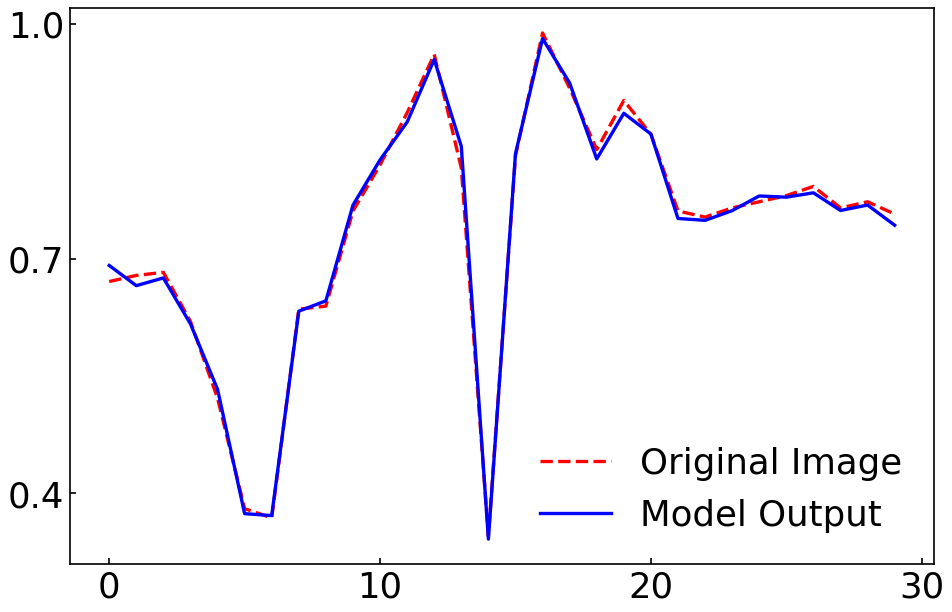

In [14]:
plt.figure(figsize=(12, 8))
format_settings(left=0.08, right=0.98, bottom=0.08, fs=32, lw=3
        )


plt.plot(image_target[40, ::2], color='r', linestyle='--',label='Original Image')

plt.plot(predicted3[40, ::2], color='b', label='Model Output')
plt.yticks([0.4, 0.7, 1])
plt.xticks([0, 10, 20, 30])
plt.legend()
plt.savefig('/root/zhangzhongwang/book/cat_fitting/cat_fitting_large_ini_line40_even.png', dpi=300)
